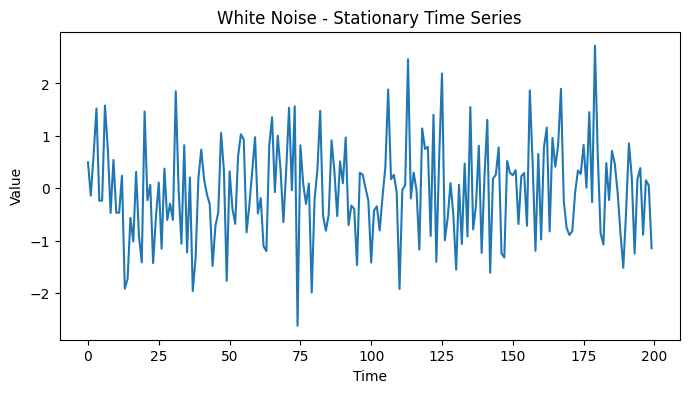

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

time_points = 200
white_noise = np.random.normal(loc=0, scale=1, size=time_points)
trend = np.linspace(0, 5, time_points)
time_series = white_noise + trend

plt.figure(figsize=(8, 4))
plt.plot(white_noise)
plt.title("White Noise - Stationary Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

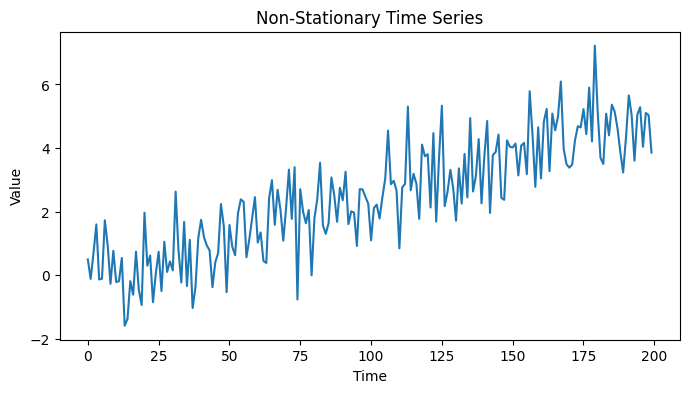

In [2]:
plt.figure(figsize=(8, 4))
plt.plot(time_series)
plt.title("Non-Stationary Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [3]:
from statsmodels.tsa.stattools import adfuller

# Apply the ADF test
result = adfuller(white_noise)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -14.74419994660189
p-value: 2.543125112212854e-27
Critical Values:
	1%: -3.4636447617687436
	5%: -2.8761761179270766
	10%: -2.57457158581854


In [5]:
from statsmodels.tsa.stattools import kpss

# Apply the KPSS test
result = kpss(white_noise)

print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[3].items():
    print(f'\t{key}: {value}')

KPSS Statistic: 0.1797495164082443
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-5-7103f58d25fa>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(white_noise)


## Select 5 time series from https://github.com/jbrownlee/Datasets and compute the stationary test (ADF and KPSS). Determine if its series are stationary or not.


In [8]:
# Import libraries
import pandas as pd

## Dataset 1

In [15]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
passengers = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


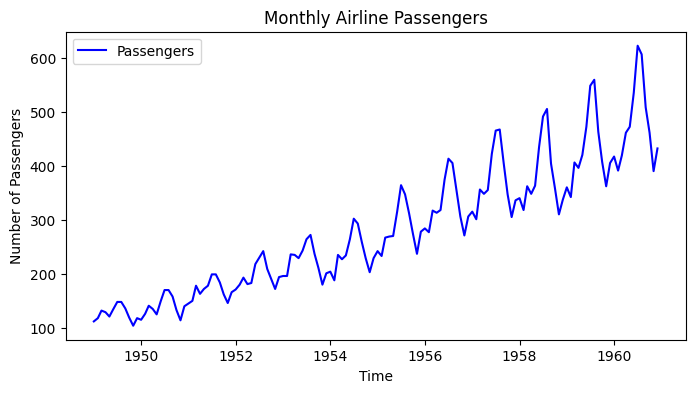

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(passengers, label='Passengers', color='blue')
plt.title("Monthly Airline Passengers")
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

In [21]:
# Apply the ADF test on the airline passengers time series
result_passengers = adfuller(passengers['Passengers'])
print("ADF Test Results for Airline Passengers Time Series:")
print(f'ADF Statistic: {result_passengers[0]}')
print(f'p-value: {result_passengers[1]}')
print('Critical Values:')
for key, value in result_passengers[4].items():
    print(f'\t{key}: {value}')

ADF Test Results for Airline Passengers Time Series:
ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


In [25]:
result_passengers = kpss(passengers['Passengers'])
print("KPSS Test Results for Airline Passengers Time Series:")
print(f'KPSS Statistic: {result_passengers[0]}')
print(f'p-value: {result_passengers[1]}')
print('Critical Values:')
for key, value in result_passengers[3].items():
    print(f'\t{key}: {value}')

KPSS Test Results for Airline Passengers Time Series:
KPSS Statistic: 1.6513122354165206
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-25-85837d351cc2>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_passengers = kpss(passengers['Passengers'])


## Dataset 2

In [28]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-max-temperatures.csv"
temperatures = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset
temperatures.head()

,Temperature
Date,
1981-01-01,38.1
1981-01-02,32.4
1981-01-03,34.5
1981-01-04,20.7
1981-01-05,21.5


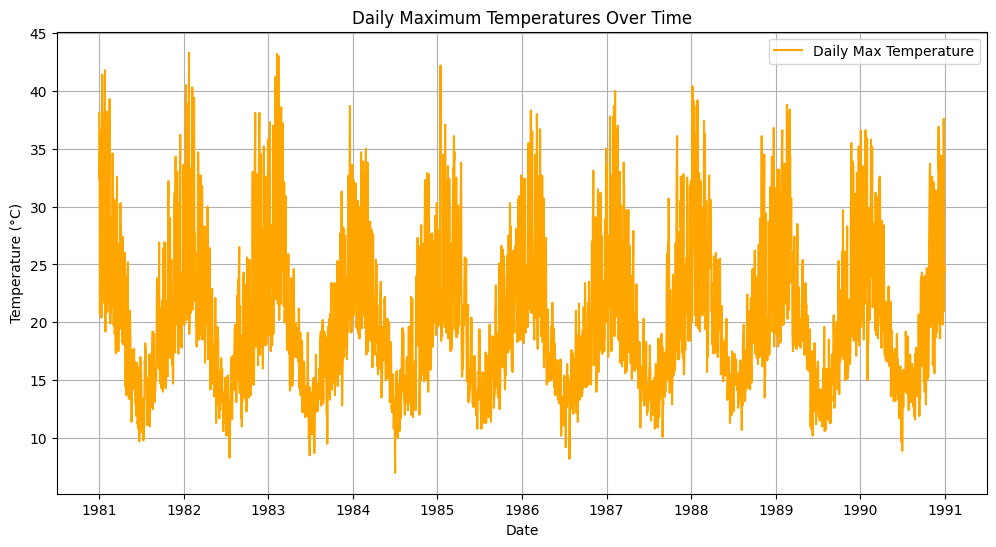

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(temperatures, label='Daily Max Temperature', color='orange')
plt.title("Daily Maximum Temperatures Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

In [30]:
# Apply the ADF test
result_adf = adfuller(temperatures['Temperature'])

print("ADF Test Results:")
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'\t{key}: {value}')

ADF Test Results:
ADF Statistic: -4.603703028446938
p-value: 0.00012715478116454568
Critical Values:
	1%: -3.432152735611742
	5%: -2.8623365480522964
	10%: -2.567194014828981


In [31]:
# Apply the KPSS test
result_kpss = kpss(temperatures['Temperature'])

print("\nKPSS Test Results:")
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')
print('Critical Values:')
for key, value in result_kpss[3].items():
    print(f'\t{key}: {value}')


KPSS Test Results:
KPSS Statistic: 0.0505299044166939
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-31-ebf718119fc3>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(temperatures['Temperature'])


## Dataset 3

In [17]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv"
shampoo = pd.read_csv(url)
shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


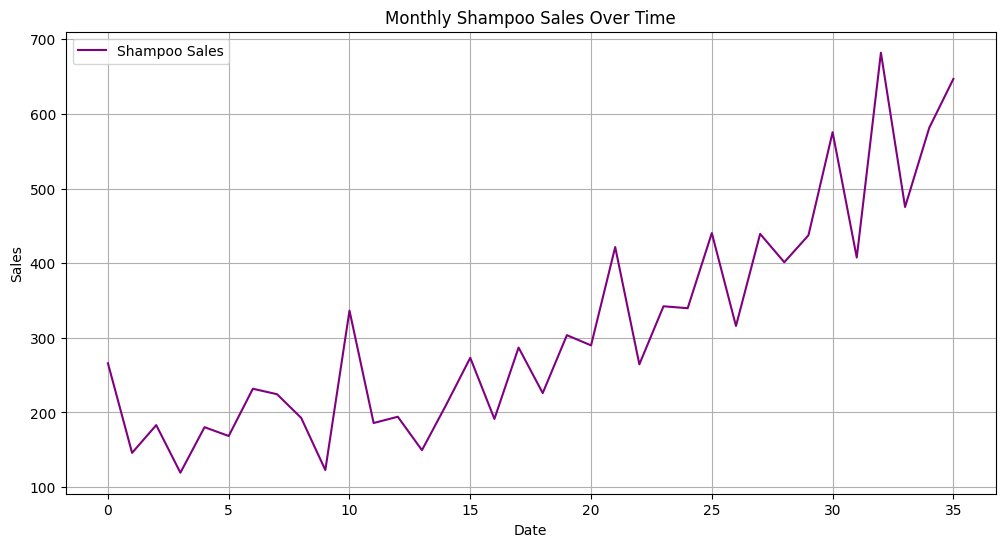

In [32]:
# Plotting the shampoo sales
plt.figure(figsize=(12, 6))
plt.plot(shampoo['Sales'], label='Shampoo Sales', color='purple')
plt.title("Monthly Shampoo Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

In [33]:
# Apply the ADF test
result_adf = adfuller(shampoo['Sales'])

print("ADF Test Results:")
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'\t{key}: {value}')

ADF Test Results:
ADF Statistic: 3.060142083641181
p-value: 1.0
Critical Values:
	1%: -3.7238633119999998
	5%: -2.98648896
	10%: -2.6328004


In [34]:
# Apply the KPSS test
result_kpss = kpss(shampoo['Sales'])

print("\nKPSS Test Results:")
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')
print('Critical Values:')
for key, value in result_kpss[3].items():
    print(f'\t{key}: {value}')


KPSS Test Results:
KPSS Statistic: 0.7527760620404709
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-34-8a98eadb0fa7>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(shampoo['Sales'])


## Dataset 4

In [36]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv"
pollution = pd.read_csv(url)
pollution['datetime'] = pd.to_datetime(pollution[['year', 'month', 'day', 'hour']])
pollution.set_index('datetime', inplace=True)
pollution.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


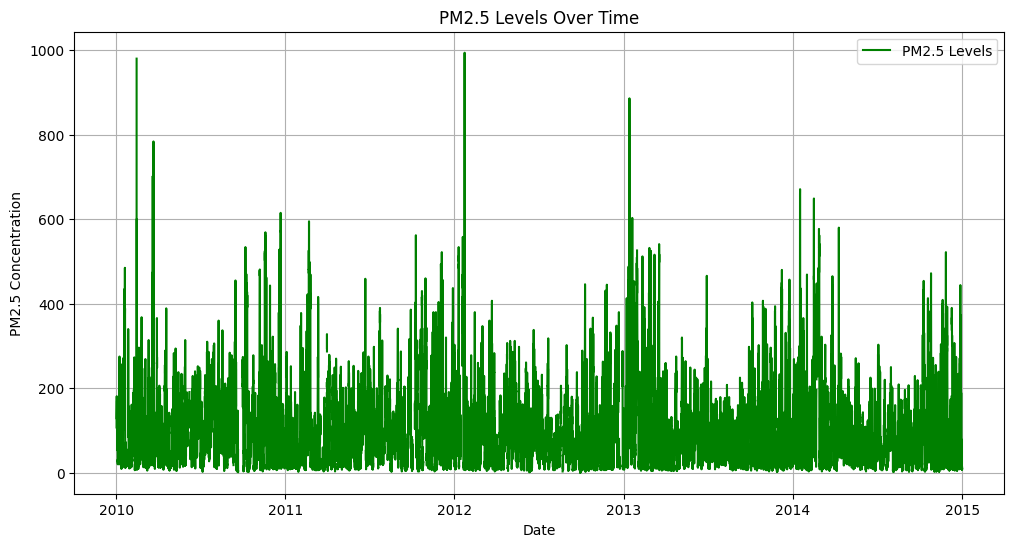

In [37]:
# Plotting PM2.5 levels over time
plt.figure(figsize=(12, 6))
plt.plot(pollution['pm2.5'], label='PM2.5 Levels', color='green')
plt.title("PM2.5 Levels Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration")
plt.legend()
plt.grid()
plt.show()

In [38]:
# Apply the ADF test on PM2.5 levels
result_adf = adfuller(pollution['pm2.5'].dropna())

print("ADF Test Results:")
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'\t{key}: {value}')

ADF Test Results:
ADF Statistic: -20.606824646403776
p-value: 0.0
Critical Values:
	1%: -3.430506819878383
	5%: -2.8616093108616596
	10%: -2.5668068919322544


In [39]:
# Apply the KPSS test on PM2.5 levels
result_kpss = kpss(pollution['pm2.5'].dropna())

print("\nKPSS Test Results:")
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')
print('Critical Values:')
for key, value in result_kpss[3].items():
    print(f'\t{key}: {value}')


KPSS Test Results:
KPSS Statistic: 0.10099924750761333
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-39-8ba28ccd5011>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(pollution['pm2.5'].dropna())


## Dataset 5

In [40]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
births = pd.read_csv(url)
births['Date'] = pd.to_datetime(births['Date'])
births.set_index('Date', inplace=True)
births.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


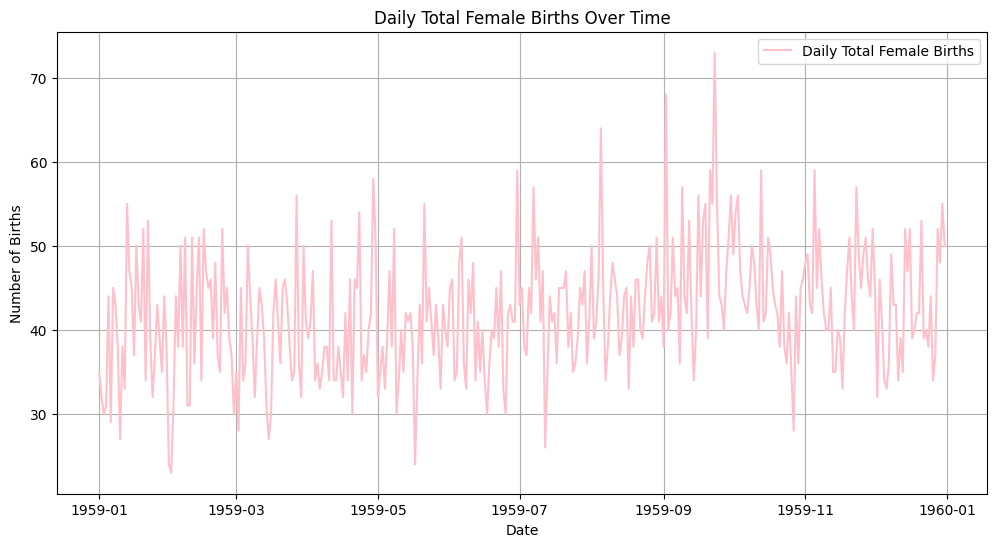

In [41]:
# Plotting the number of births over time
plt.figure(figsize=(12, 6))
plt.plot(births['Births'], label='Daily Total Female Births', color='pink')
plt.title("Daily Total Female Births Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Births")
plt.legend()
plt.grid()
plt.show()

In [42]:
# Apply the ADF test on the number of births
result_adf = adfuller(births['Births'])

print("ADF Test Results:")
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print('Critical Values:')
for key, value in result_adf[4].items():
    print(f'\t{key}: {value}')

ADF Test Results:
ADF Statistic: -4.808291253559765
p-value: 5.2434129901498554e-05
Critical Values:
	1%: -3.448748905151901
	5%: -2.8696473721448728
	10%: -2.5710891239349585


In [43]:
# Apply the KPSS test on the number of births
result_kpss = kpss(births['Births'])

print("\nKPSS Test Results:")
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')
print('Critical Values:')
for key, value in result_kpss[3].items():
    print(f'\t{key}: {value}')


KPSS Test Results:
KPSS Statistic: 1.6129657593856863
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-43-739e246b7f71>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(births['Births'])
